In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

In [4]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence = data_defence.drop(columns=['Rk', 'Matches'])
data_defence

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,57,33,...,98,28,71,15,0,56,41,98,55,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,38,29,...,116,18,46,18,1,28,77,115,76,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,45,29,...,279,87,23,1,0,22,41,86,14,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,80,48,...,338,80,37,1,0,36,62,142,11,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0,0,...,11,3,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,41,19,...,125,35,24,9,0,15,31,72,39,0
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,45,30,...,141,85,32,5,0,27,38,83,22,2
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,26,15,...,136,127,11,1,0,10,11,37,8,1
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,4,3,...,52,69,5,3,0,2,2,6,22,0


In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,825,1095,...,170,44.7,1,0.9,+0.1,13,39,29,7,79
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,921,1117,...,208,64.4,0,0.2,-0.2,6,57,4,0,58
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1322,1435,...,187,85.0,0,0.9,-0.9,10,61,5,0,56
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,944,1158,...,221,67.0,2,2.0,0.0,17,89,15,6,88
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,769,897,...,139,71.9,1,0.4,+0.6,9,67,7,1,61
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,537,653,...,66,68.2,1,1.2,-0.2,18,42,16,2,53
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,822,982,...,145,66.2,3,4.2,-1.2,44,53,43,2,103
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,236,392,...,5,80.0,2,1.4,+0.6,11,16,1,0,17


In [6]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,0,10,...,0.00,20.1,0,0,0,0.6,0.6,0.06,-0.6,-0.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,1,15,...,0.25,19.7,0,0,0,1.0,1.0,0.07,0.0,0.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,0,15,...,0.00,19.0,0,0,0,0.7,0.7,0.05,-0.7,-0.7
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,0,22,...,0.00,22.2,0,0,0,1.8,1.8,0.08,-1.8,-1.8
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,0,9,...,0.00,19.4,0,0,0,0.6,0.6,0.06,-0.6,-0.6
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,5,38,...,0.33,18.7,0,0,0,3.6,3.6,0.10,+1.4,+1.4
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,5,28,...,0.42,19.5,8,0,0,2.8,2.8,0.10,+2.2,+2.2
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,3,27,...,0.20,10.2,0,1,1,4.1,3.4,0.13,-1.1,-1.4


In [7]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [8]:
data_defence.iloc[:, 7:] = data_defence.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)

In [9]:
data_defence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 2900
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     2790 non-null   object
 1   Nation     2788 non-null   object
 2   Pos        2790 non-null   object
 3   Squad      2790 non-null   object
 4   Comp       2790 non-null   object
 5   Age        2788 non-null   object
 6   Born       2788 non-null   object
 7   90s        2790 non-null   object
 8   Tkl        2790 non-null   object
 9   TklW       2790 non-null   object
 10  Def 3rd    2790 non-null   object
 11  Mid 3rd    2790 non-null   object
 12  Att 3rd    2790 non-null   object
 13  Tkl.1      2790 non-null   object
 14  Att        2790 non-null   object
 15  Tkl%       2395 non-null   object
 16  Past       2790 non-null   object
 17  Press      2790 non-null   object
 18  Succ       2790 non-null   object
 19  %          2675 non-null   object
 20  Def 3rd.1  2790 non-null   obj

In [10]:
data_shooting = data_shooting.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [11]:
data = pd.merge(data_defence, data_shooting, on="Player")
data = data.drop_duplicates(subset='Player')
data = pd.merge(data, data_passing, on='Player')
data = data.drop_duplicates(subset='Player')
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,57.0,33.0,...,170.0,44.7,1.0,0.9,0.1,13.0,39.0,29.0,7.0,79.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,38.0,29.0,...,208.0,64.4,0.0,0.2,-0.2,6.0,57.0,4.0,0.0,58.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,45.0,29.0,...,187.0,85.0,0.0,0.9,-0.9,10.0,61.0,5.0,0.0,56.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,80.0,48.0,...,221.0,67.0,2.0,2.0,0.0,17.0,89.0,15.0,6.0,88.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,41.0,19.0,...,139.0,71.9,1.0,0.4,0.6,9.0,67.0,7.0,1.0,61.0
2786,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,45.0,30.0,...,66.0,68.2,1.0,1.2,-0.2,18.0,42.0,16.0,2.0,53.0
2787,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,26.0,15.0,...,145.0,66.2,3.0,4.2,-1.2,44.0,53.0,43.0,2.0,103.0
2788,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,4.0,3.0,...,5.0,80.0,2.0,1.4,0.6,11.0,16.0,1.0,0.0,17.0


In [12]:
data = pd.merge(player_position, data, on="Player")
data.drop_duplicates(inplace=True)
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,...,208.0,64.4,0.0,0.2,-0.2,6.0,57.0,4.0,0.0,58.0
1,7,Laurent Abergel,Defensive Midfield,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,...,221.0,67.0,2.0,2.0,0.0,17.0,89.0,15.0,6.0,88.0
2,8,Charles Abi,Centre-Forward,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Matthis Abline,Centre-Forward,fr FRA,FW,Rennes,fr Ligue 1,18-344,2003,1.1,...,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,12,Tammy Abraham,Centre-Forward,eng ENG,FW,Roma,it Serie A,24-156,1997,25.5,...,41.0,82.9,3.0,3.1,-0.1,28.0,27.0,22.0,3.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,2817,Kurt Zouma,Centre-Back,fr FRA,DF,West Ham,eng Premier League,27-131,1994,15.8,...,117.0,65.8,0.0,0.0,0.0,0.0,11.0,1.0,0.0,23.0
1855,2818,Igor Zubeldia,Defensive Midfield,es ESP,DF,Real Sociedad,es La Liga,24-342,1997,10.8,...,138.0,77.5,1.0,0.0,1.0,0.0,31.0,1.0,0.0,16.0
1856,2820,Martín Zubimendi,Defensive Midfield,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,...,139.0,71.9,1.0,0.4,0.6,9.0,67.0,7.0,1.0,61.0
1857,2822,Martin Ødegaard,Attacking Midfield,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,...,145.0,66.2,3.0,4.2,-1.2,44.0,53.0,43.0,2.0,103.0


In [13]:
data = data[data['90s']>=5.0]
who = ['Centre-Back', 'Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data['Bp90'] = data['Blocks']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,...,0.2,-0.2,6.0,57.0,4.0,0.0,58.0,4.978355,3.290043,1.991342
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-025,1988,18.2,...,0.2,-0.2,4.0,91.0,4.0,0.0,67.0,2.802198,4.67033,1.923077
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-130,1991,18.4,...,2.7,0.3,36.0,71.0,35.0,20.0,88.0,3.532609,1.413043,1.304348
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-301,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-342,1996,22.9,...,0.3,0.7,2.0,82.0,2.0,0.0,59.0,2.751092,5.152838,1.004367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-075,1999,11.3,...,0.9,-0.9,7.0,19.0,6.0,5.0,30.0,3.362832,1.238938,2.035398
1841,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-269,1992,17.1,...,2.7,0.3,20.0,27.0,23.0,11.0,56.0,1.754386,0.818713,2.222222
1844,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-361,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1851,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-082,1996,6.6,...,0.9,0.1,7.0,55.0,14.0,3.0,46.0,3.636364,1.212121,1.060606


In [14]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,...,0.2,-0.2,6.0,57.0,4.0,0.0,58.0,4.978355,3.290043,1.991342
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-025,1988,18.2,...,0.2,-0.2,4.0,91.0,4.0,0.0,67.0,2.802198,4.67033,1.923077
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-130,1991,18.4,...,2.7,0.3,36.0,71.0,35.0,20.0,88.0,3.532609,1.413043,1.304348
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-301,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-342,1996,22.9,...,0.3,0.7,2.0,82.0,2.0,0.0,59.0,2.751092,5.152838,1.004367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-075,1999,11.3,...,0.9,-0.9,7.0,19.0,6.0,5.0,30.0,3.362832,1.238938,2.035398
1841,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-269,1992,17.1,...,2.7,0.3,20.0,27.0,23.0,11.0,56.0,1.754386,0.818713,2.222222
1844,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-361,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1851,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-082,1996,6.6,...,0.9,0.1,7.0,55.0,14.0,3.0,46.0,3.636364,1.212121,1.060606


In [15]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-130,1991,18.4,...,2.7,0.3,36.0,71.0,35.0,20.0,88.0,3.532609,1.413043,1.304348
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-301,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-315,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-150,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-274,2001,13.3,...,1.1,0.9,12.0,17.0,9.0,5.0,24.0,6.240602,1.729323,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-256,1992,9.4,...,0.4,-0.4,4.0,17.0,10.0,3.0,25.0,3.829787,2.978723,2.12766
1840,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-075,1999,11.3,...,0.9,-0.9,7.0,19.0,6.0,5.0,30.0,3.362832,1.238938,2.035398
1841,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-269,1992,17.1,...,2.7,0.3,20.0,27.0,23.0,11.0,56.0,1.754386,0.818713,2.222222
1844,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-361,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

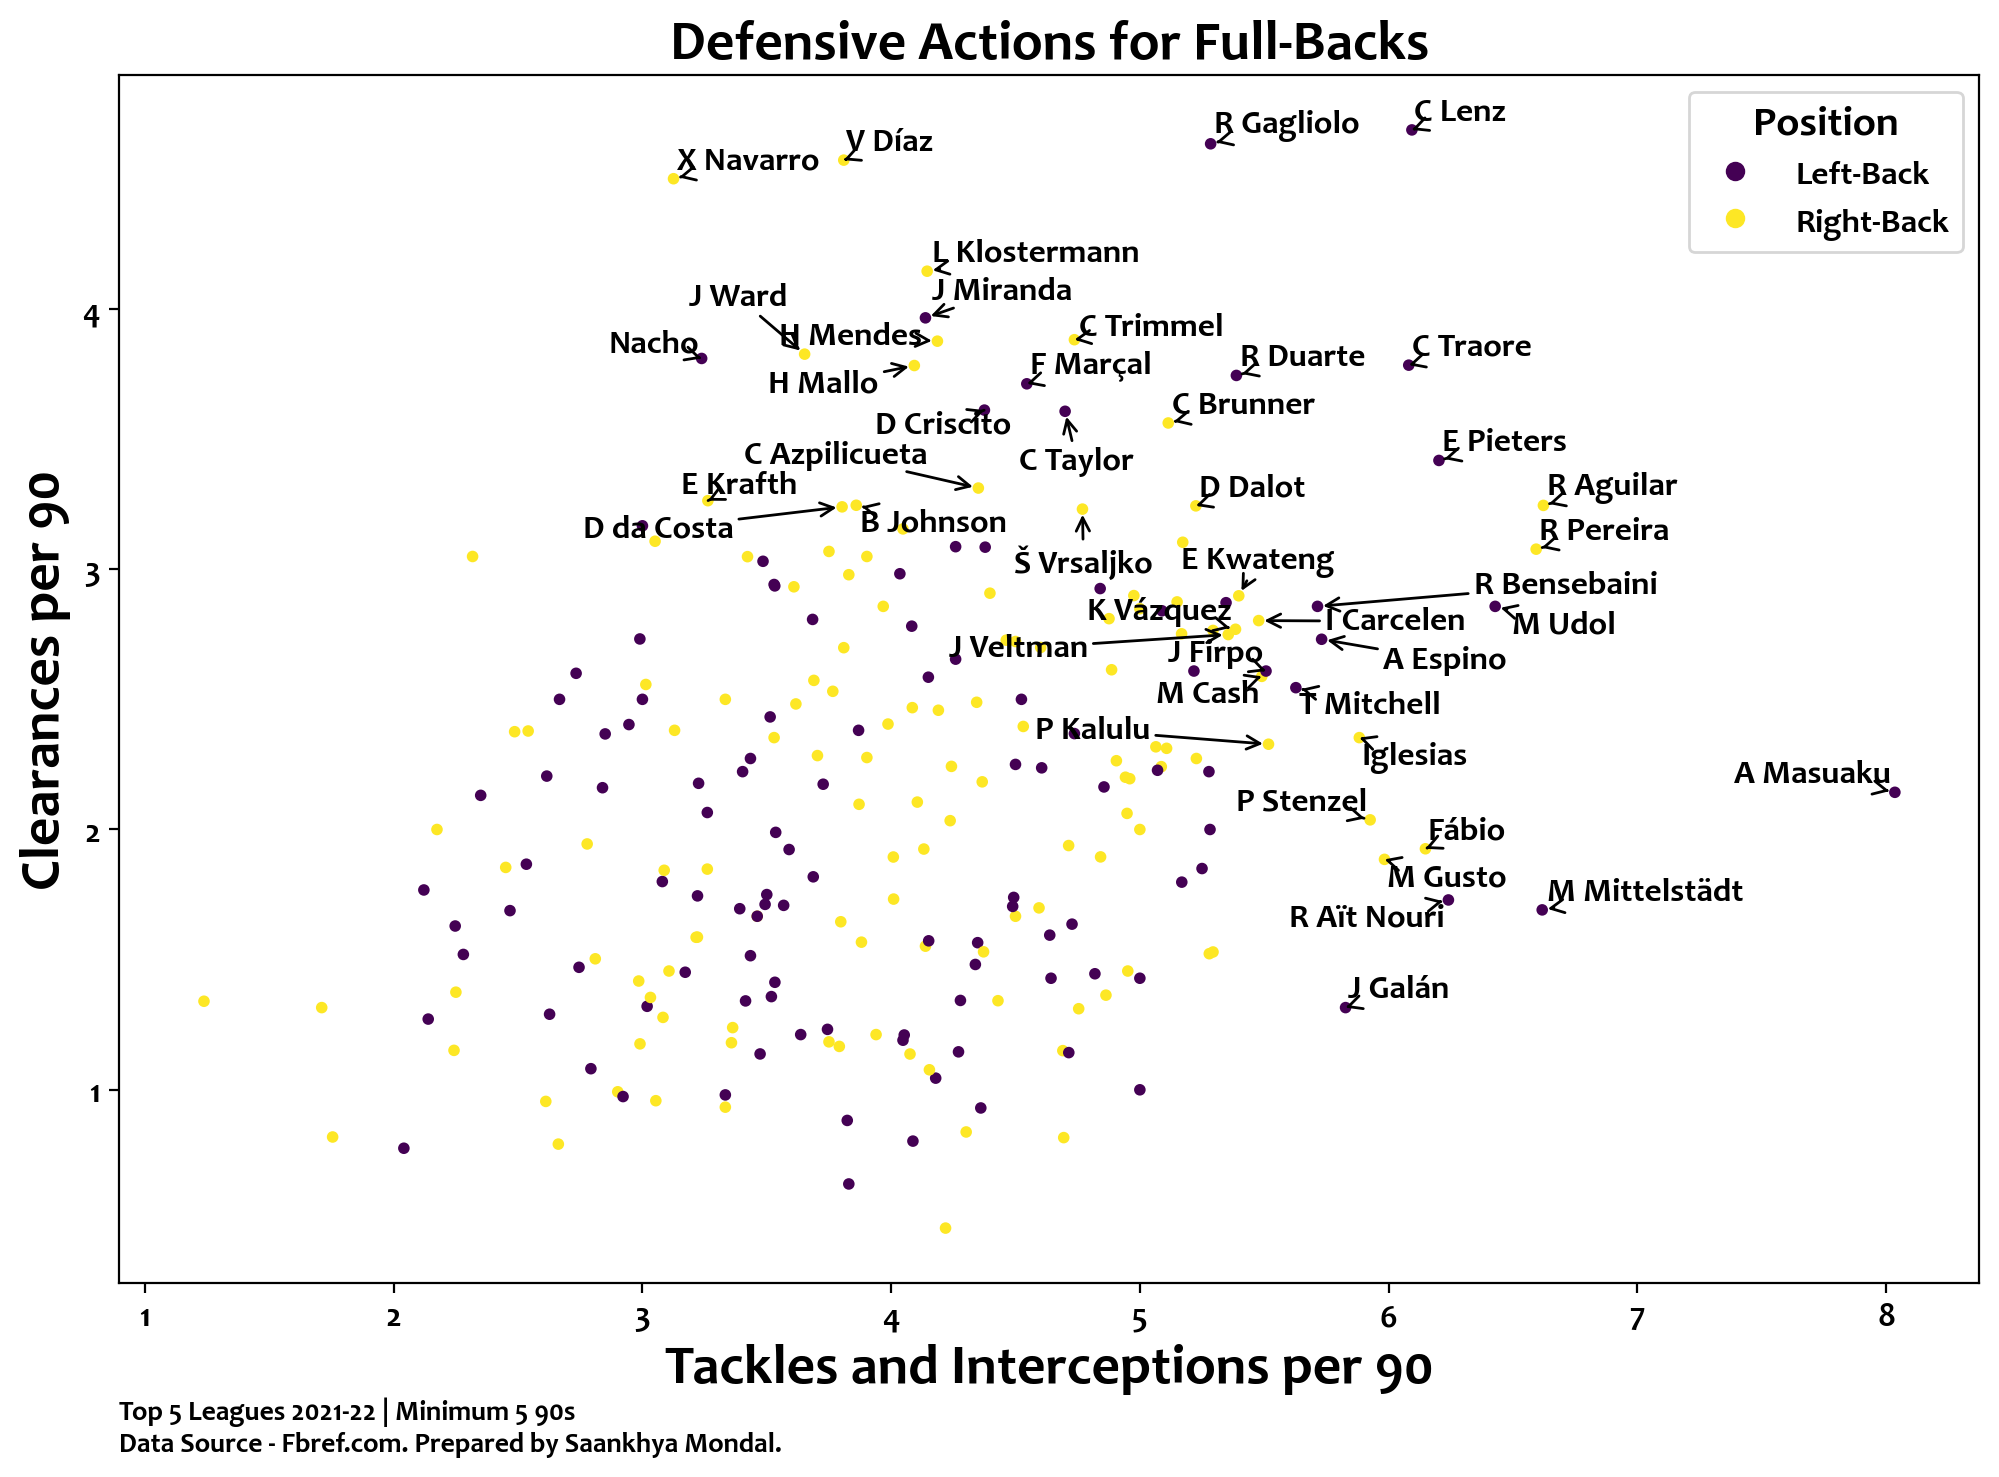

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['TAp90'])
par_y = list(data['Clrp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Clrp90'].astype(float).quantile(0.90)
outlier_bottom = data['Clrp90'].astype(float).quantile(0.02)
outlier_right = data['TAp90'].astype(float).quantile(0.90)
outlier_left = data['TAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Tackles and Interceptions per 90', fontsize=20)
ax.set_ylabel('Clearances per 90', fontsize=20)
ax.set_title('Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/DefensiveActions_FB.png', dpi=400, bbox_inches='tight')

In [18]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-130,1991,18.4,...,2.7,0.3,36.0,71.0,35.0,20.0,88.0,3.532609,1.413043,1.304348
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-301,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-315,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-150,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-274,2001,13.3,...,1.1,0.9,12.0,17.0,9.0,5.0,24.0,6.240602,1.729323,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-256,1992,9.4,...,0.4,-0.4,4.0,17.0,10.0,3.0,25.0,3.829787,2.978723,2.12766
1840,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-075,1999,11.3,...,0.9,-0.9,7.0,19.0,6.0,5.0,30.0,3.362832,1.238938,2.035398
1841,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-269,1992,17.1,...,2.7,0.3,20.0,27.0,23.0,11.0,56.0,1.754386,0.818713,2.222222
1844,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-361,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [19]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-130,1991,18.4,...,2.7,0.3,36.0,71.0,35.0,20.0,88.0,3.532609,1.413043,1.304348
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-301,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-315,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-150,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-274,2001,13.3,...,1.1,0.9,12.0,17.0,9.0,5.0,24.0,6.240602,1.729323,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-256,1992,9.4,...,0.4,-0.4,4.0,17.0,10.0,3.0,25.0,3.829787,2.978723,2.12766
1840,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-075,1999,11.3,...,0.9,-0.9,7.0,19.0,6.0,5.0,30.0,3.362832,1.238938,2.035398
1841,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-269,1992,17.1,...,2.7,0.3,20.0,27.0,23.0,11.0,56.0,1.754386,0.818713,2.222222
1844,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-361,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 7 to 1851
Data columns (total 75 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S. No.     242 non-null    int64 
 1   Player     242 non-null    object
 2   Position   242 non-null    object
 3   Nation     242 non-null    object
 4   Pos        242 non-null    object
 5   Squad      242 non-null    object
 6   Comp       242 non-null    object
 7   Age        242 non-null    object
 8   Born       242 non-null    object
 9   90s        242 non-null    object
 10  Tkl        242 non-null    object
 11  TklW       242 non-null    object
 12  Def 3rd    242 non-null    object
 13  Mid 3rd    242 non-null    object
 14  Att 3rd    242 non-null    object
 15  Tkl.1      242 non-null    object
 16  Att_x      242 non-null    object
 17  Tkl%       242 non-null    object
 18  Past       242 non-null    object
 19  Press      242 non-null    object
 20  Succ       242 non-null    obje

In [21]:
new_data = data[['Player', '90s', 'Tkl', 'TklW', 'Past', 'Press', 'Succ', 'Blocks', 'Int', 'Clr', 'Gls', 'Sh_y', 'SoT', 'xG', 'PrgDist', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]
new_data.iloc[:, 2:] = new_data.iloc[:, 2:].div(new_data['90s'], axis=0)
new_data.drop(columns=['90s'], inplace=True)
new_data = new_data.drop_duplicates(subset='Player')
new_data

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Player,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr,Gls,...,SoT,xG,PrgDist,Ast,xA,KP,1/3,PPA,CrsPA,Prog
7,Marcos Acuña,2.336957,1.467391,0.380435,10.869565,3.695652,1.304348,1.195652,1.413043,0.054348,...,0.217391,0.070652,465.108696,0.163043,0.146739,1.956522,3.858696,1.902174,1.086957,4.782609
12,Martin Agirregabiria,2.345679,1.17284,1.049383,11.851852,3.271605,1.666667,1.419753,2.530864,0.0,...,0.0,0.006173,304.567901,0.061728,0.055556,0.802469,2.592593,1.111111,0.617284,3.148148
17,Ruben Aguilar,4.10596,2.384106,1.258278,16.887417,5.960265,1.456954,2.516556,3.245033,0.0,...,0.066225,0.006623,419.403974,0.066225,0.02649,0.529801,5.695364,1.324503,0.397351,5.89404
21,Ola Aina,1.949153,1.016949,0.59322,10.59322,3.898305,1.694915,2.288136,2.033898,0.0,...,0.169492,0.016949,255.59322,0.0,0.110169,1.101695,2.881356,1.525424,0.423729,4.152542
22,Rayan Aït Nouri,4.285714,2.255639,0.977444,21.954887,7.067669,1.879699,1.954887,1.729323,0.0,...,0.150376,0.030075,216.240602,0.150376,0.082707,0.902256,1.278195,0.676692,0.37594,1.804511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,Joseba Zaldúa,2.765957,1.489362,0.744681,12.446809,2.765957,2.12766,1.06383,2.978723,0.0,...,0.106383,0.0,277.978723,0.0,0.042553,0.425532,1.808511,1.06383,0.319149,2.659574
1840,Gabriele Zappa,1.238938,0.707965,0.884956,17.610619,4.424779,2.035398,2.123894,1.238938,0.0,...,0.176991,0.035398,301.327434,0.0,0.079646,0.619469,1.681416,0.530973,0.442478,2.654867
1841,Davide Zappacosta,1.052632,0.409357,0.643275,15.555556,3.567251,2.222222,0.701754,0.818713,0.05848,...,0.233918,0.093567,251.637427,0.175439,0.157895,1.169591,1.578947,1.345029,0.643275,3.274854
1844,Deyovaisio Zeefuik,1.904762,1.111111,0.793651,14.761905,4.444444,2.698413,1.904762,2.698413,0.0,...,0.0,0.0,169.206349,0.0,0.063492,0.634921,1.111111,0.793651,0.15873,3.174603


In [22]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [23]:
x = new_data.iloc[:, 1:].astype(float)

In [24]:
x = np.array(x)
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)

In [44]:
n_cluster = 2
kmeans = KMeans(n_clusters=n_cluster, max_iter=10000).fit(x)
gmm = GaussianMixture(n_components=n_cluster, max_iter=10000).fit(x)

In [45]:
y_km = kmeans.labels_
y_km

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [46]:
y_gmm = gmm.predict(x)
y_gmm

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [47]:
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=5000, learning_rate=200)
z = tsne.fit_transform(x)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 242 samples in 0.000s...
[t-SNE] Computed neighbors for 242 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 242 / 242
[t-SNE] Mean sigma: 1.921877
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.014973
[t-SNE] KL divergence after 900 iterations: 0.673196


In [48]:
data = pd.DataFrame()
data['Player'] = new_data['Player']
data['y_km'] = y_km
data['y_gmm'] = y_gmm
data["Component-1"] = z[:,0]
data["Component-2"] = z[:,1]

In [49]:
data

,Player,y_km,y_gmm,Component-1,Component-2
7,Marcos Acuña,0,0,6.408015,-2.648758
12,Martin Agirregabiria,1,1,-1.563400,-1.957718
17,Ruben Aguilar,1,1,-1.186428,6.854680
21,Ola Aina,1,0,0.720896,-3.823021
22,Rayan Aït Nouri,1,1,-0.635745,5.455352
...,...,...,...,...,...
1836,Joseba Zaldúa,1,1,-2.999595,-1.825689
1840,Gabriele Zappa,1,1,-0.608423,-2.949683
1841,Davide Zappacosta,0,1,3.643183,-6.425168
1844,Deyovaisio Zeefuik,1,1,-4.417544,0.717442


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

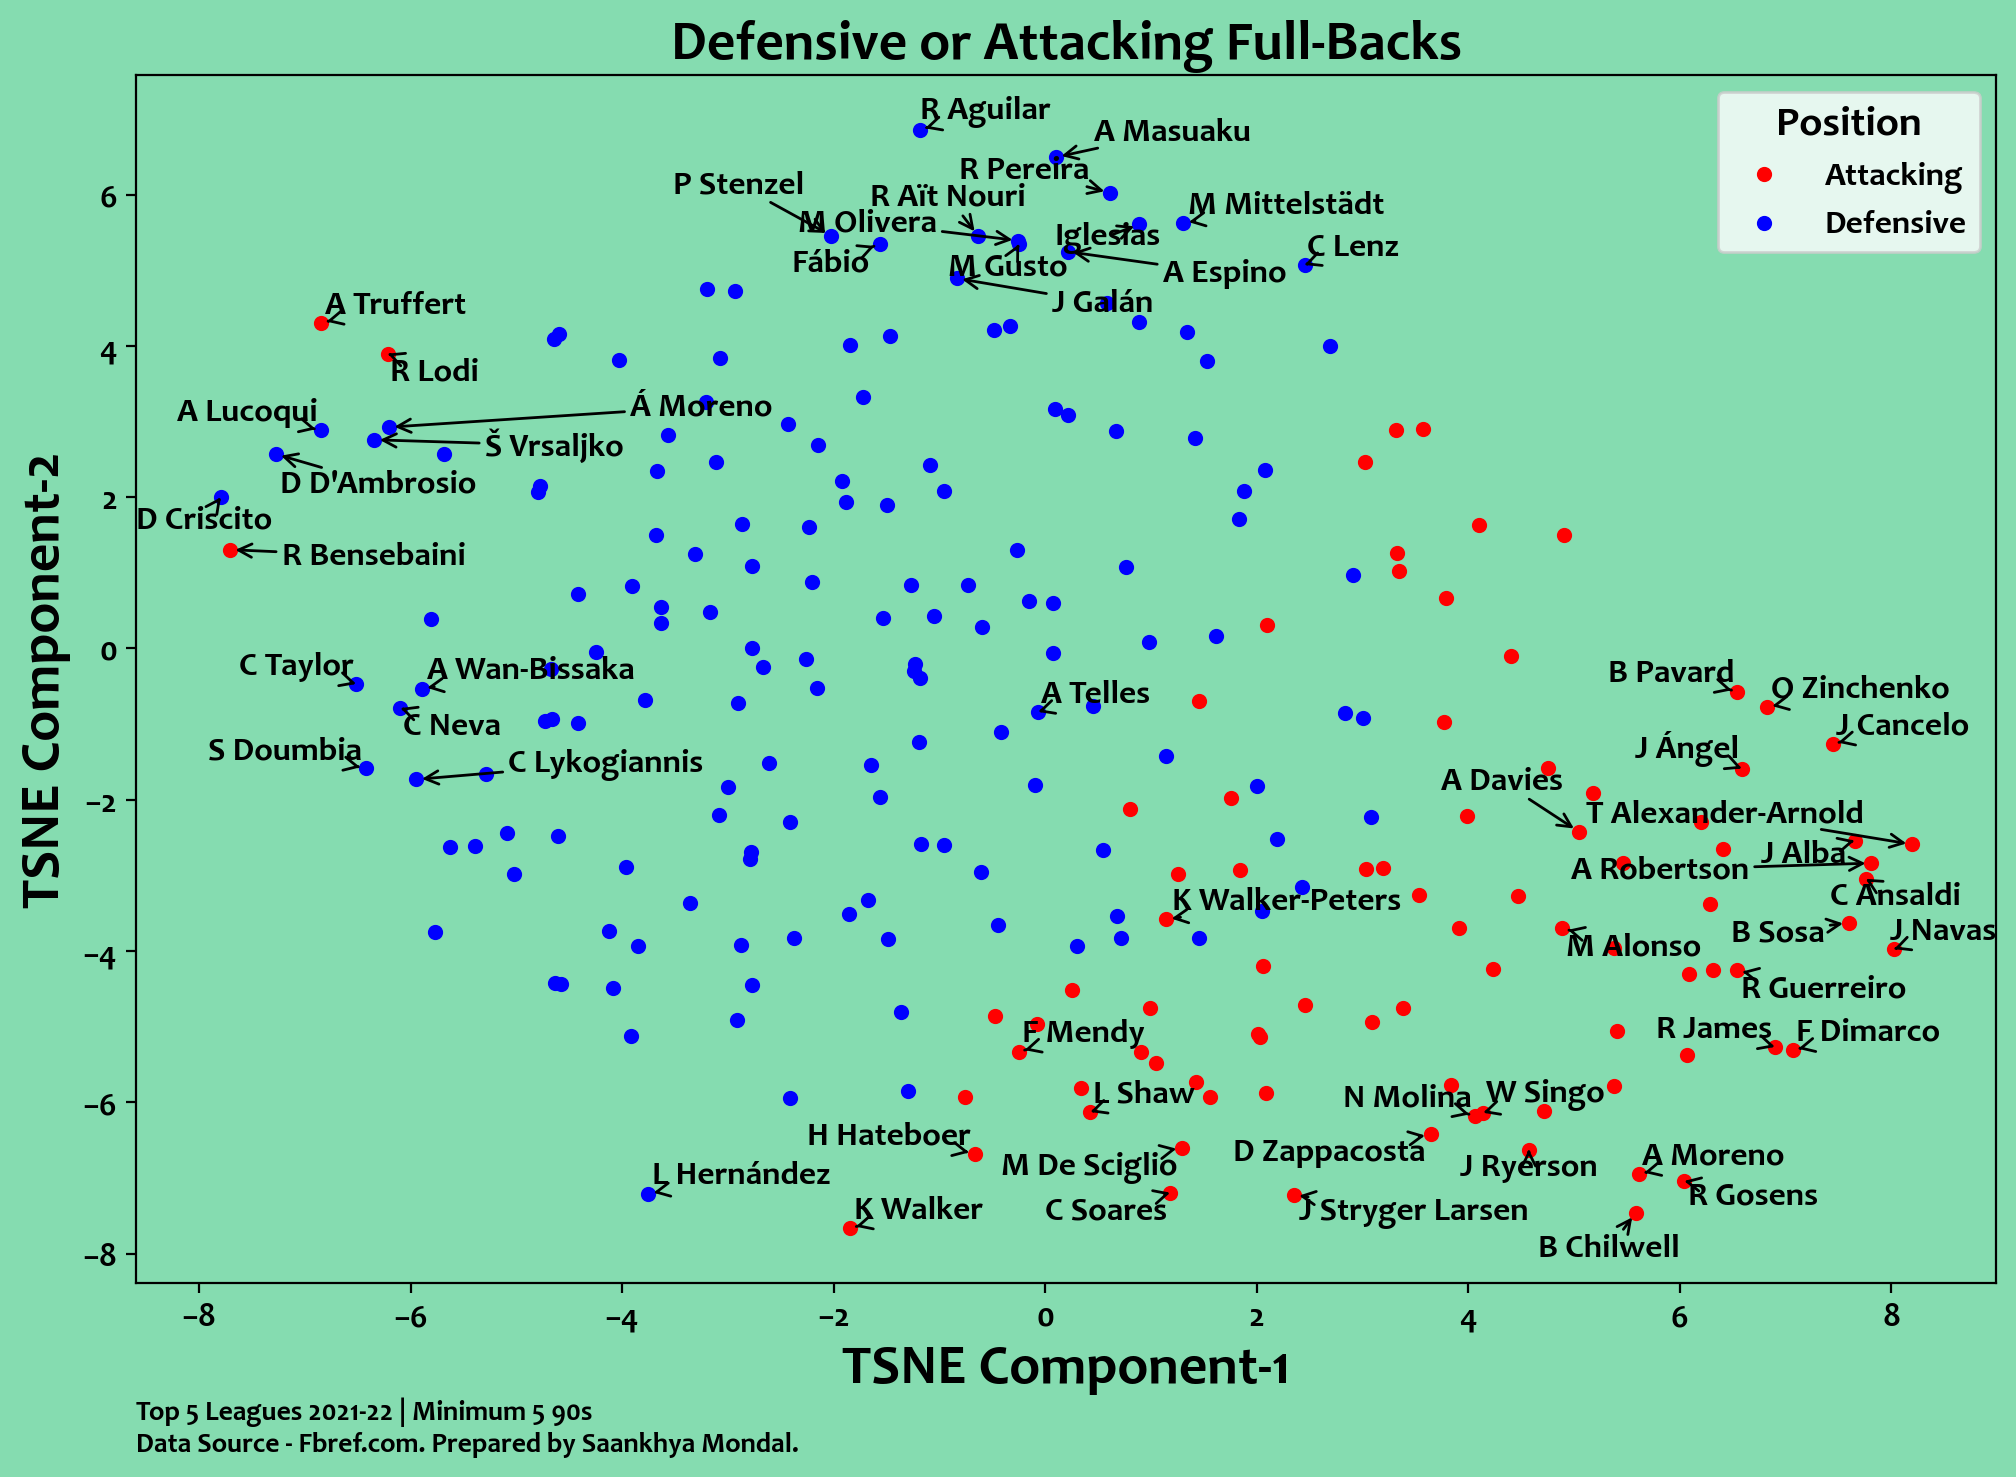

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
colors = {0:'red', 1:'blue'}
grouped = data.groupby('y_km')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Component-1', y='Component-2', label=key, color=colors[key])

outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)

fbs = ['Walker', 'Alba', 'Zinchenko', 'Mendy', 'Alonso', 'Robertson', 'Trent', 'Reece', 'Wan-Bissaka', 'Shaw', 'Telles', 'Alphonso']

def check_name_present(name):
    for i in fbs:
        if i in name:
            return True
    return False

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [51]:
fig.savefig('Images/TSNE-Viz-K-Means-Cluster_FB.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

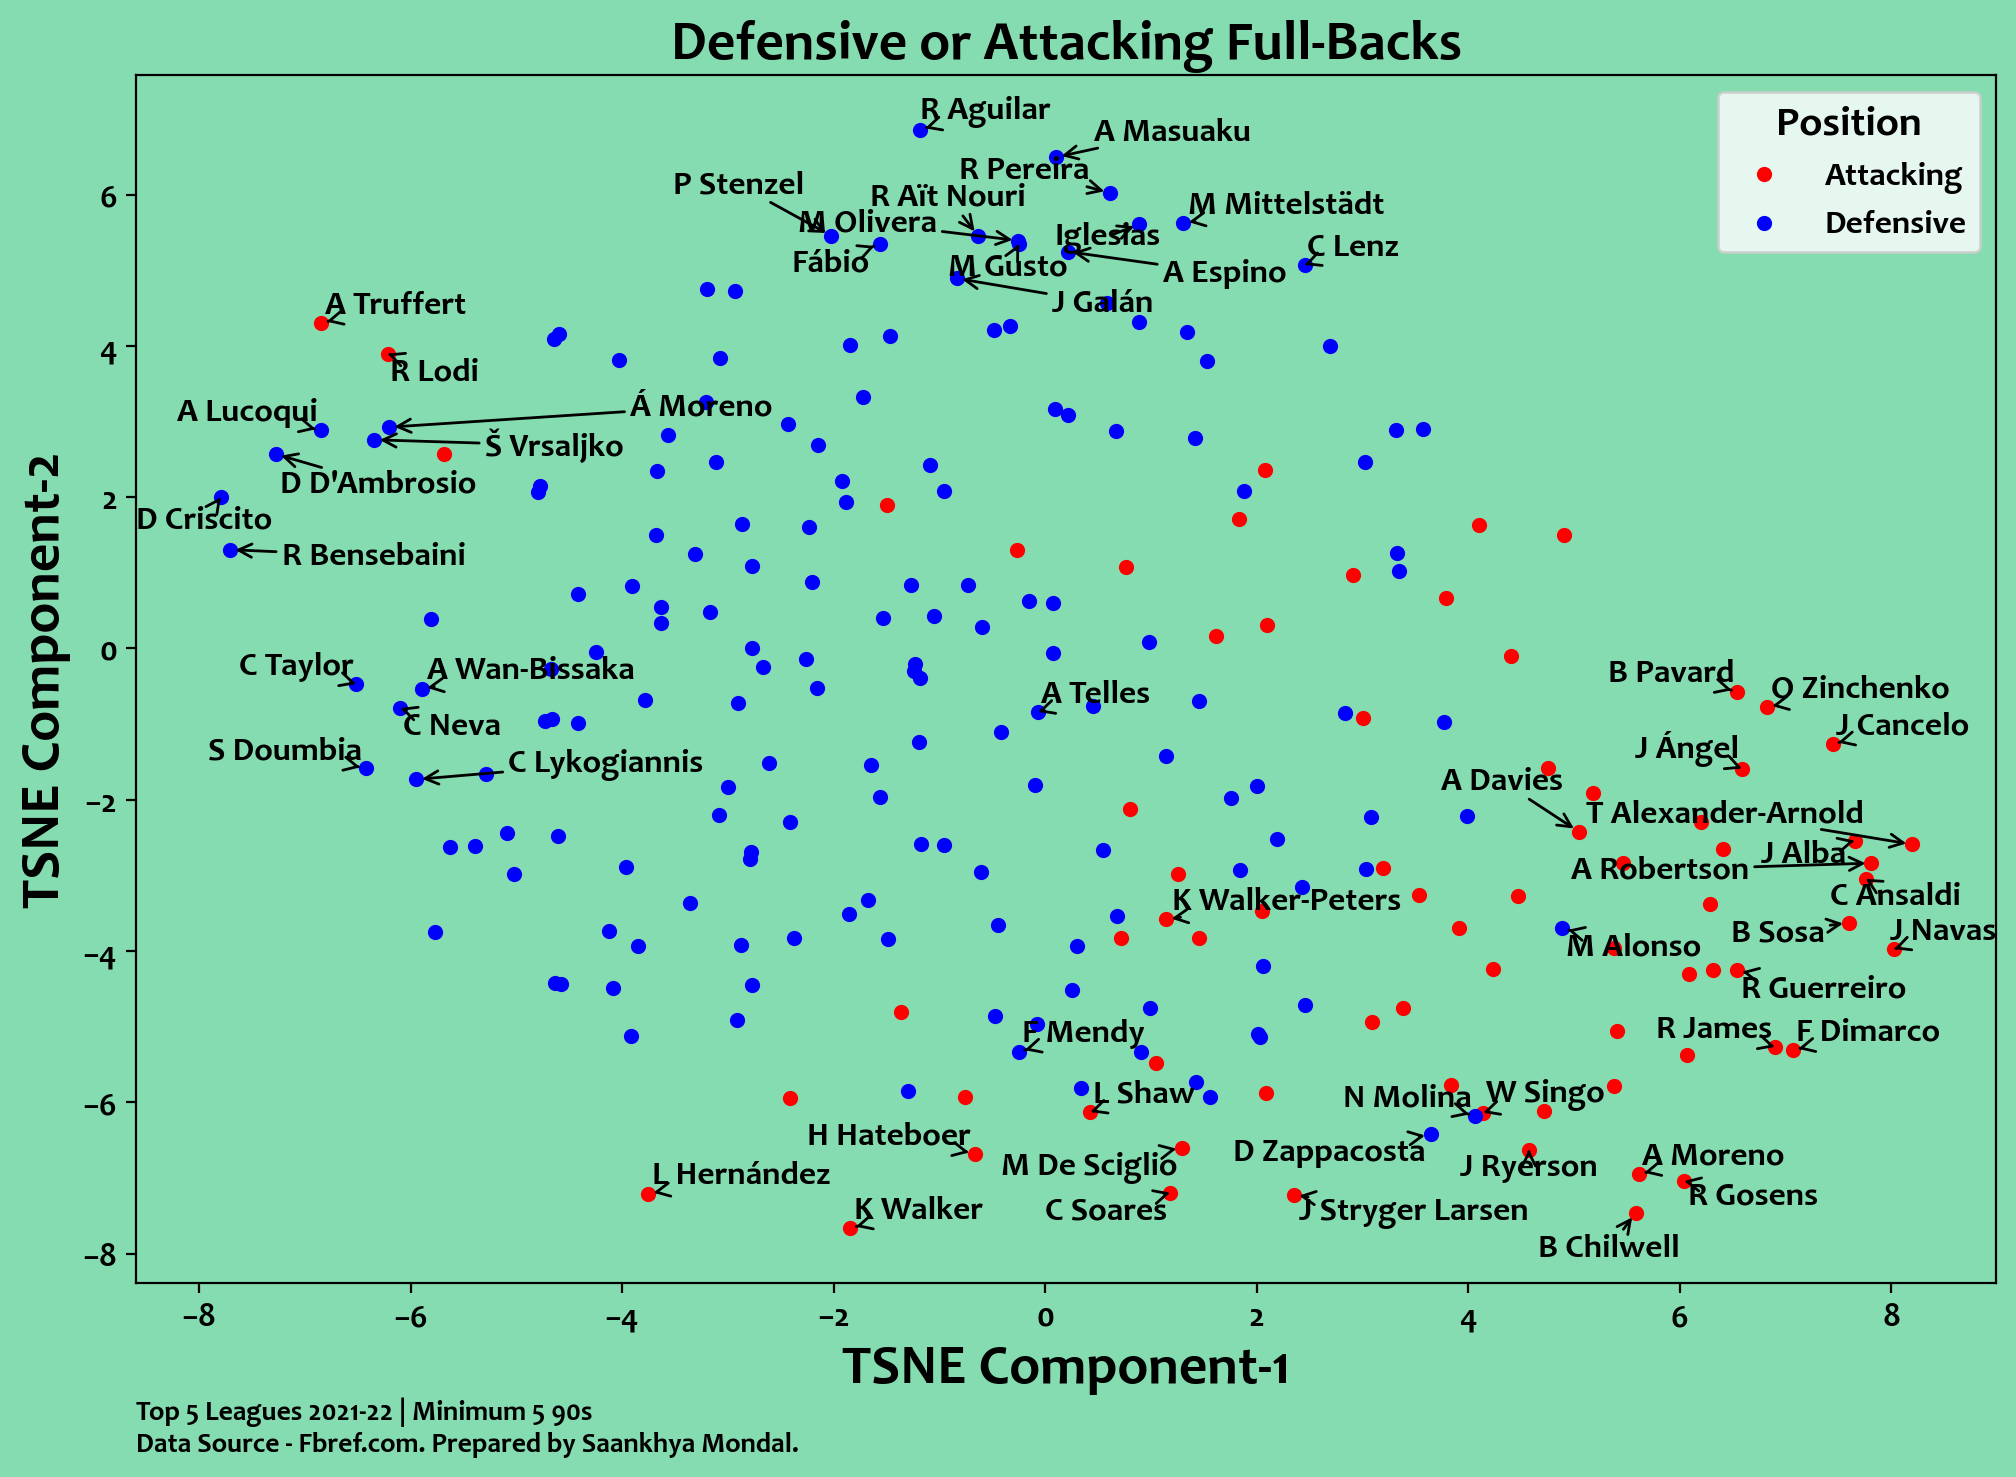

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
colors = {0:'red', 1:'blue'}
grouped = data.groupby('y_gmm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Component-1', y='Component-2', label=key, color=colors[key])


outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)

fbs = ['Walker', 'Alba', 'Zinchenko', 'Mendy', 'Alonso', 'Robertson', 'Trent', 'Reece', 'Wan-Bissaka', 'Shaw', 'Telles', 'Alphonso']

def check_name_present(name):
    for i in fbs:
        if i in name:
            return True
    return False

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [53]:
fig.savefig('Images/TSNE-Viz-GMM-Cluster_FB.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())